<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/mnist_tf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape, y_train.shape)
print(y_train)

print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


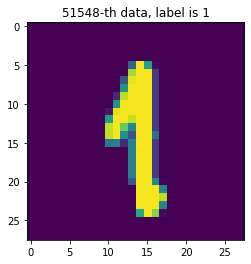

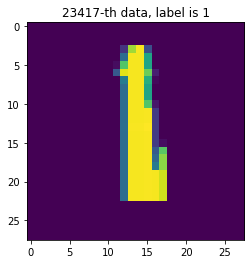

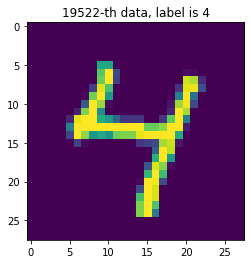

In [11]:
import matplotlib.pyplot as plt
import numpy as np

sample_size=3

random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
  img = x_train[idx,:]
  label = y_train[idx]
  plt.figure()

  plt.imshow(img)
  plt.title(f'{idx}-th data, label is {label}')

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

print(f'train data: {x_train.shape}  label: {y_train.shape}')
print(f'validation data: {x_val.shape}  label: {y_val.shape}')

train data: (42000, 28, 28)  label: (42000,)
validation data: (18000, 28, 28)  label: (18000,)


In [13]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train= (x_train.reshape((num_x_train, 28*28)))/255
x_val= (x_val.reshape((num_x_val, 28*28)))/255
x_test= (x_test.reshape((num_x_test, 28*28)))/255

print(x_train.shape)

(42000, 784)


In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(64,activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

소프트맥스 함수로 얻은 값이 시그모이드 함수로 얻은 값보다 비교가 쉬움. 

In [16]:
def softmax(arr):
  m=np.max(arr)
  arr = arr-m 
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x): 
  return 1/ (1+np.exp(-x))

case_1 = np.array([3.1,3.0,2.9])
case_2 = np.array([2.0,1.0,0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)},   softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)},   softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948],   softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668],   softmax [0.61  0.224 0.166]


In [17]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['acc'])

In [18]:
history = model.fit(x_train, y_train, epochs= 30, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.4691 - acc: 0.8730 - val_loss: 0.2576 - val_acc: 0.9273
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2129 - acc: 0.9387 - val_loss: 0.1897 - val_acc: 0.9463
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1612 - acc: 0.9536 - val_loss: 0.1714 - val_acc: 0.9498
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1310 - acc: 0.9624 - val_loss: 0.1459 - val_acc: 0.9573
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1086 - acc: 0.9683 - val_loss: 0.1308 - val_acc: 0.9619
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0927 - acc: 0.9732 - val_loss: 0.1272 - val_acc: 0.9627
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0832 - acc: 0.9749 - val_loss: 0.1197 - val_acc: 0.9651
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [19]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

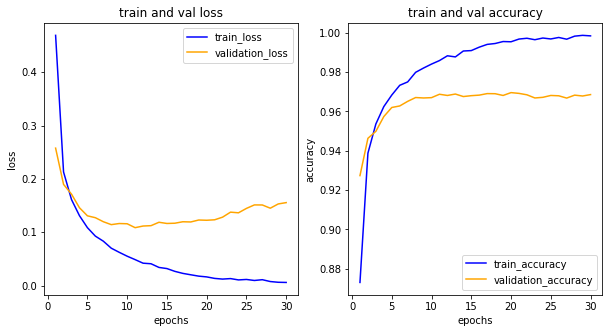

In [22]:
import matplotlib.pyplot as plt

his_dict = history.history
loss= his_dict['loss']
val_loss = his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig= plt.figure(figsize=(10,5))

#loss graph (train, val)
ax1= fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

#aaccuracy (train, val)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_accuracy')
ax2.plot(epochs, val_acc, color='orange', label='validation_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

In [23]:
model.evaluate(x_test,y_test)   # 모델 평가 

313/313 [==============================] - 1s 2ms/step - loss: 0.1324 - acc: 0.9741


[0.13236625492572784, 0.9740999937057495]

In [25]:
import numpy as np 
results=model.predict(x_test)    # 학습모델로 예측
print(results.shape)
np.set_printoptions(precision=7)
print(f'probabilities of being included in each labels: \n{results[0]}')

(10000, 10)
probabilities of being included in each labels: 
[1.4564242e-13 2.1658209e-15 9.8955844e-11 2.4501750e-07 6.6758400e-20
 2.8182021e-12 6.4008164e-22 9.9999905e-01 1.6439580e-09 7.2332091e-07]


results 데이터는 10000장의 이미지에 대한 각 label에 속할 확률 값을 담고 있음. 
results[0]의 경우, 이 이미지는 7번째 값이  가장 값이 크므로 7에 속할 확률이 큰것. 
- argmax 할 경우 7을 뽑아줄것.. 

위 출력값을 보면 7번째 값이 9.99999 -> 즉, 첫번째 그림은 아마도 숫자 7일 확률이 높음을 알 수 있다. 

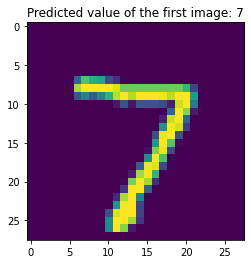

In [26]:
arg_results = np.argmax(results, axis=-1)   # 10000개 이미지 중 각 label중 확률이 높은것 가져오기. 
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first image: '+str(arg_results[0]))
plt.show()

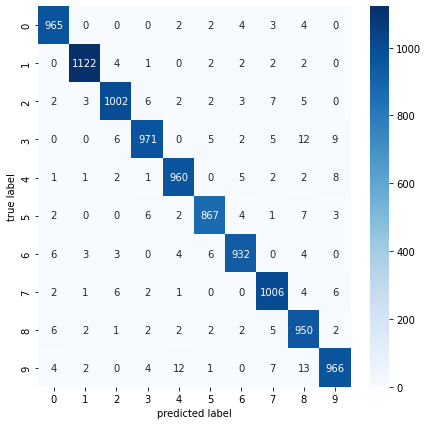

In [27]:
#1 혼동행렬로 확인 
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))  # 실제 라벨값, 예측 라벨값 
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [28]:
#2 classification_report 분류 보고서 로 확인

print('\n', classification_report(np.argmax(y_test,axis=-1), np.argmax(results, axis=-1)))  # 실제 라벨값, 예측 라벨값


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

